In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv("immigration_Canada.csv")
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
3,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1
4,Immigrants,Foreigners,Angola,903,Africa,911,Middle Africa,902,Developing regions,1,...,268,295,184,106,76,62,61,39,70,45


In [3]:
my_list=df.columns[9:]

In [4]:
df_new=df.melt(id_vars=['Type','Coverage','OdName','AREA','REG','RegName','DEV','DevName'],value_vars=my_list,var_name=['Year'],value_name='Number')
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
3,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1
4,Immigrants,Foreigners,Angola,903,Africa,911,Middle Africa,902,Developing regions,1,...,268,295,184,106,76,62,61,39,70,45


findfont: Font family ['Arial nova'] not found. Falling back to DejaVu Sans.


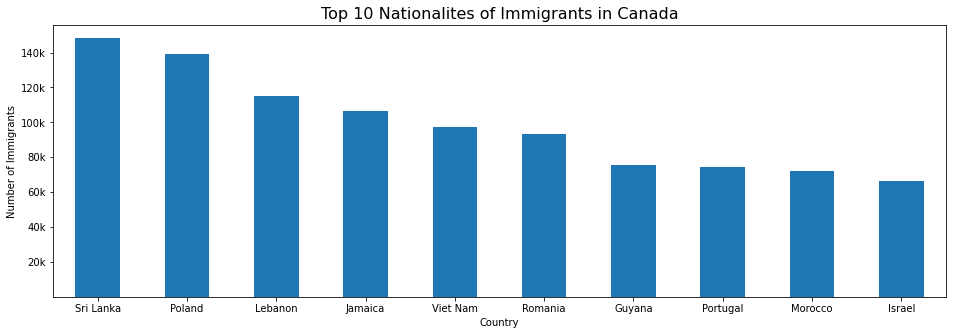

In [5]:
plt.figure(figsize=[16,5])
df_new.groupby('OdName')['Number'].sum().sort_values(ascending=False)[1:11].plot(kind='bar');
plt.xticks(rotation=0);
plt.yticks([20000,40000,60000,80000,100000,120000,140000],['20k','40k','60k','80k','100k','120k','140k'])
plt.title('Top 10 Nationalites of Immigrants in Canada',fontname='Arial nova',fontsize=16)
plt.xlabel('Country');
plt.ylabel('Number of Immigrants');

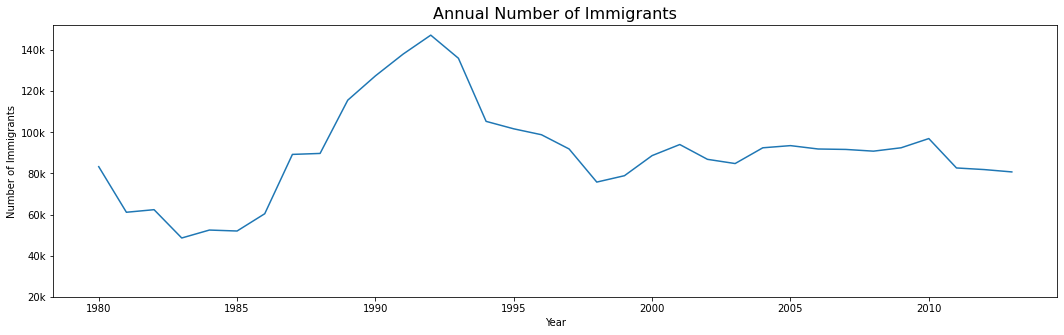

In [6]:
plt.figure(figsize=[18,5])                  
df_new.groupby('Year')['Number'].sum().plot(kind='line');
plt.title('Annual Number of Immigrants',fontname='Arial nova',fontsize=16);
plt.yticks([20000,40000,60000,80000,100000,120000,140000],['20k','40k','60k','80k','100k','120k','140k'])
plt.ylabel('Number of Immigrants');

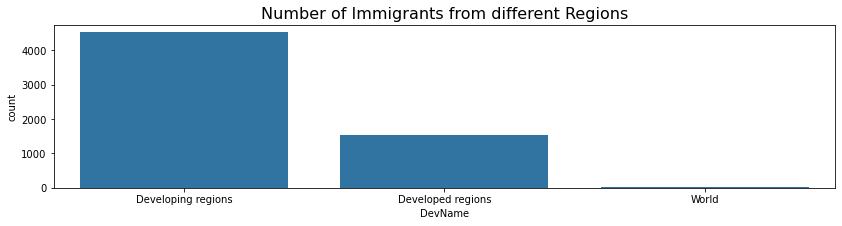

In [7]:
plt.figure(figsize=[14,3])
base_color=sns.color_palette()[0]
sns.countplot(data=df_new,x='DevName',color=base_color);
plt.title('Number of Immigrants from different Regions',fontname='Arial nova',fontsize=16);

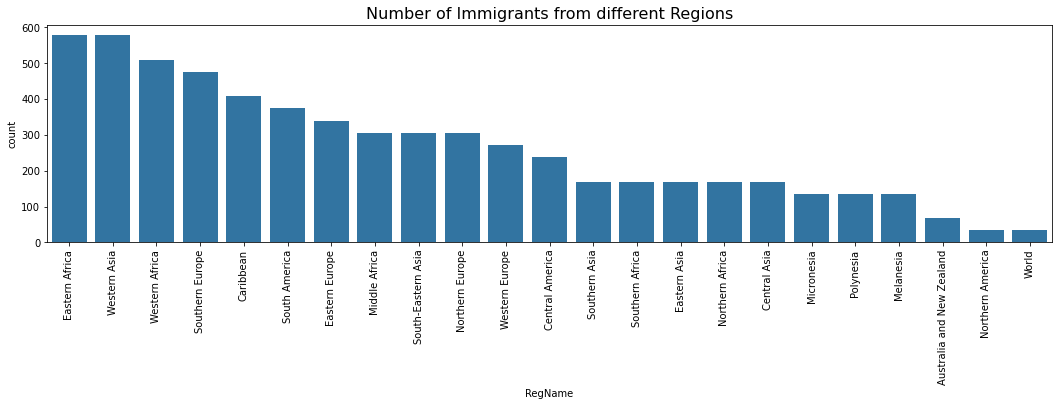

In [8]:
plt.figure(figsize=[18,4])
base_color=sns.color_palette()[0]
order=df_new['RegName'].value_counts().index
sns.countplot(data=df_new,x='RegName',color=base_color,order=order);
plt.title('Number of Immigrants from different Regions',fontname='Arial nova',fontsize=16);
plt.xticks(rotation=90);